<font size="+3"><strong>Project Description</strong></font>
<font size="+3">  
    
Develop a convolutional neural network (CNN) to classify images
of handwritten digits from the MNIST dataset.

# HANDWRITTEN DIGIT RECOGNITION

![HANDWRITTEN](https://i.imgur.com/Su00XUA.png)

<font size="+3"><strong>Import Libraries </strong></font>

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow as tf
from keras import layers, models

# Reading Data
 

In [253]:
df = pd.read_csv('D:\\TeknoSoft Internship\\ADVANCED LEVEL TASK\\Dataset\\digit-recognizer\\train.csv')

In [231]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
df.shape

(42000, 785)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [235]:
df.isnull().sum().info()

<class 'pandas.core.series.Series'>
Index: 785 entries, label to pixel783
Series name: None
Non-Null Count  Dtype
--------------  -----
785 non-null    int64
dtypes: int64(1)
memory usage: 12.3+ KB


In [236]:
X = df.drop(columns=['label'])
y = df['label']
print(X.shape)
y.shape

(42000, 784)


(42000,)

# Reshape

In [237]:
X = X.values.reshape(-1,28,28,1)/255

# Data Visualization

In [238]:
y[0]

1

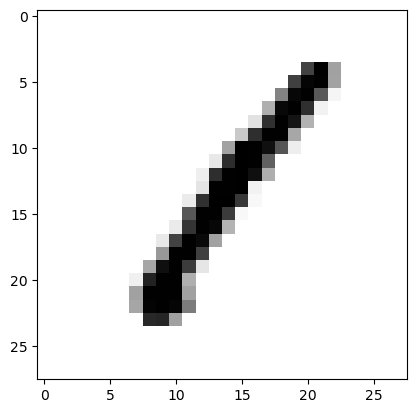

In [239]:
plt.imshow(X[0], cmap= plt.cm.binary);  

# More Images With Target Label

In [240]:
y.head(8)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
Name: label, dtype: int64

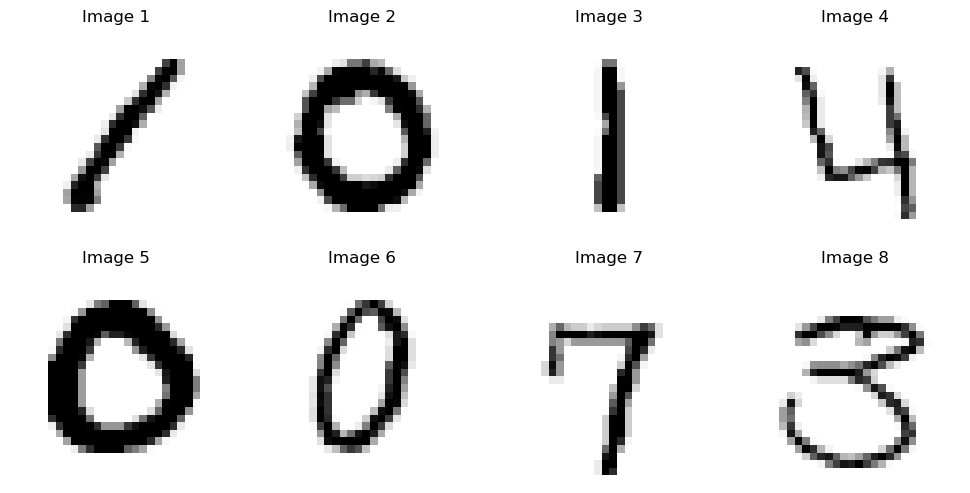

In [241]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
axes = axes.flatten()

for i in range(8):
    axes[i].imshow(X[i], cmap=plt.cm.binary)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Split Data

In [245]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing a CNN architecture Using Tensorflow

In [246]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Training the CNN model

In [247]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8161 - loss: 0.6806 - val_accuracy: 0.9536 - val_loss: 0.1669
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9637 - loss: 0.1377 - val_accuracy: 0.9726 - val_loss: 0.1009
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9754 - loss: 0.0885 - val_accuracy: 0.9769 - val_loss: 0.0846
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9790 - loss: 0.0696 - val_accuracy: 0.9775 - val_loss: 0.0765
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9842 - loss: 0.0561 - val_accuracy: 0.9789 - val_loss: 0.0717
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9866 - loss: 0.0482 - val_accuracy: 0.9802 - val_loss: 0.0672
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9897 - loss: 0.0382 - val_accuracy: 0.9813 - val_loss: 0.0638
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9887 - loss: 0.0389 - val_accuracy: 0.

# Evaluating the performance of the model

In [248]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9779 - loss: 0.0751
Test Loss: 0.06859113276004791
Test Accuracy: 0.9796428680419922


In [249]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

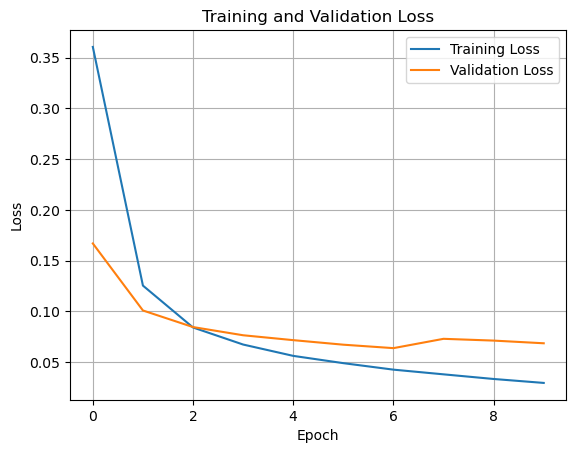

In [250]:
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('Training and Validation Loss')
plt.show()

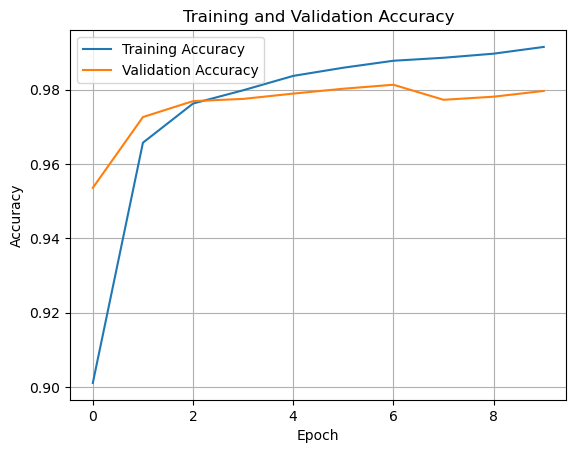

In [251]:
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title('Training and Validation Accuracy')
plt.show()